In [6]:
# Read the jun 2013 power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2013-06-power-survey-london.csv")

In [8]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
0,2013-06-01 00:00:00,28.841,2.666,17.601,38.010,192.506,70.301,22.418,55.198,3.866,...,82,86,679,37,4262,669.672000,0.157126,0.263917,1,0:00
1,2013-06-01 00:30:00,26.124,2.286,16.574,32.886,169.456,62.862,21.424,46.470,3.770,...,82,86,677,37,4262,594.306000,0.139443,0.232293,1,0:30
2,2013-06-01 01:00:00,24.143,2.238,15.170,29.249,155.277,58.933,17.762,42.945,3.543,...,82,86,677,37,4262,534.065001,0.125309,0.199032,1,1:00
3,2013-06-01 01:30:00,22.547,2.144,14.126,28.413,143.576,57.203,15.988,38.656,3.464,...,82,86,677,37,4263,490.777000,0.115125,0.165880,1,1:30
4,2013-06-01 02:00:00,21.833,1.972,13.175,27.348,135.699,52.296,14.142,37.785,3.348,...,82,86,677,37,4263,455.068000,0.106748,0.142431,1,2:00


In [24]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [38]:
# Create a dataframe representing energy consumption for jun 19th 2013, the day
# of the England vs. Ukraine game.

df_England_Ukraine = df.loc[df['day']==19]
df_England_Ukraine = df_England_Ukraine.set_index(df_England_Ukraine["tstamp"])
df_England_Ukraine.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2013-06-19 00:00:00,23.821,2.765,15.678,32.311,177.155,62.260,18.319,50.907,4.488,...,81,84,676,36,4247,602.932,0.141967,0.229636,19,0:00
0:30,2013-06-19 00:30:00,23.694,2.425,16.143,29.376,155.527,57.656,18.223,46.849,4.692,...,82,84,675,36,4247,542.390,0.127711,0.191911,19,0:30
1:00,2013-06-19 01:00:00,22.353,2.190,14.180,27.975,142.696,55.282,16.250,45.460,4.096,...,82,84,675,36,4247,495.964,0.116780,0.165861,19,1:00
1:30,2013-06-19 01:30:00,20.800,1.919,13.306,27.886,125.607,50.892,15.715,42.467,3.531,...,82,84,675,36,4247,449.553,0.105852,0.136319,19,1:30
2:00,2013-06-19 02:00:00,22.403,1.859,12.913,26.049,121.647,49.378,14.798,42.283,3.279,...,82,84,675,36,4247,434.292,0.102259,0.131729,19,2:00


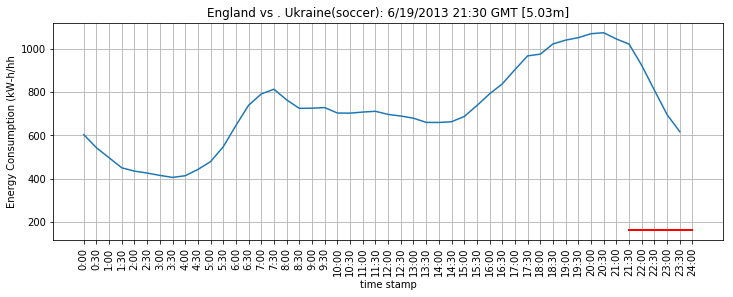

In [51]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_England_Ukraine["tstamp"],df_England_Ukraine["sigma"])
plt.xticks(rotation='vertical')
plt.title("England vs . Ukraine(soccer): 6/19/2013 21:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['21:30', '24:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.show()

In [41]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_England_Ukraine["A_sigma"] + df_England_Ukraine["B_sigma"] + df_England_Ukraine["C_sigma"]
Acorn2  = df_England_Ukraine["D_sigma"] + df_England_Ukraine["E_sigma"]
Acorn3  = df_England_Ukraine["F_sigma"] + df_England_Ukraine["G_sigma"] + df_England_Ukraine["H_sigma"] \
                                           + df_England_Ukraine["I_sigma"] + df_England_Ukraine["J_sigma"]
Acorn4  = df_England_Ukraine["K_sigma"] + df_England_Ukraine["L_sigma"] + df_England_Ukraine["M_sigma"] \
                                           + df_England_Ukraine["N_sigma"]
Acorn5  = df_England_Ukraine["O_sigma"] + df_England_Ukraine["P_sigma"] + df_England_Ukraine["Q_sigma"]

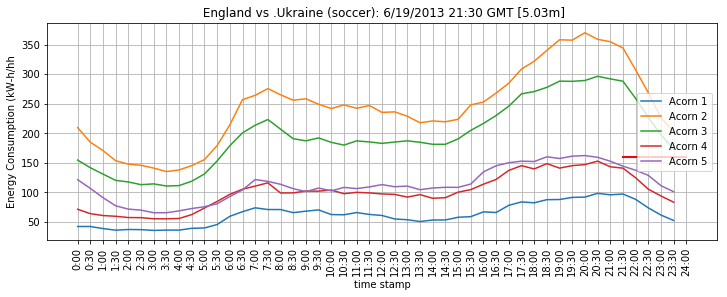

In [45]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_England_Ukraine["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_Ukraine["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_Ukraine["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_Ukraine["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_Ukraine["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title(" England vs .Ukraine (soccer): 6/19/2013 21:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['21:30', '24:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [16]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

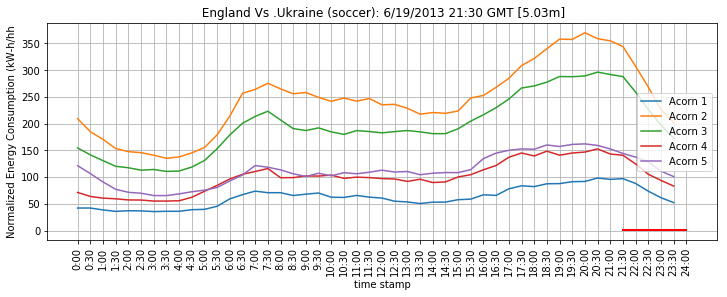

In [44]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_England_Ukraine["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_England_Ukraine["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_England_Ukraine["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_England_Ukraine["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_England_Ukraine["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title(" England Vs .Ukraine (soccer): 6/19/2013 21:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['21:30', '24:00'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [34]:
# Create a dataframe representing energy consumption for jun 19th 2013, the day
# of the England vs. Ukraine game.

df_England_Ukraine= df.loc[df['day']==19]
df_England_Ukraine= df_England_Ukraine.set_index(df_England_Ukraine["tstamp"])
df_England_Ukraine.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2013-06-19 00:00:00,23.821,2.765,15.678,32.311,177.155,62.260,18.319,50.907,4.488,...,81,84,676,36,4247,602.932,0.141967,0.229636,19,0:00
0:30,2013-06-19 00:30:00,23.694,2.425,16.143,29.376,155.527,57.656,18.223,46.849,4.692,...,82,84,675,36,4247,542.390,0.127711,0.191911,19,0:30
1:00,2013-06-19 01:00:00,22.353,2.190,14.180,27.975,142.696,55.282,16.250,45.460,4.096,...,82,84,675,36,4247,495.964,0.116780,0.165861,19,1:00
1:30,2013-06-19 01:30:00,20.800,1.919,13.306,27.886,125.607,50.892,15.715,42.467,3.531,...,82,84,675,36,4247,449.553,0.105852,0.136319,19,1:30
2:00,2013-06-19 02:00:00,22.403,1.859,12.913,26.049,121.647,49.378,14.798,42.283,3.279,...,82,84,675,36,4247,434.292,0.102259,0.131729,19,2:00


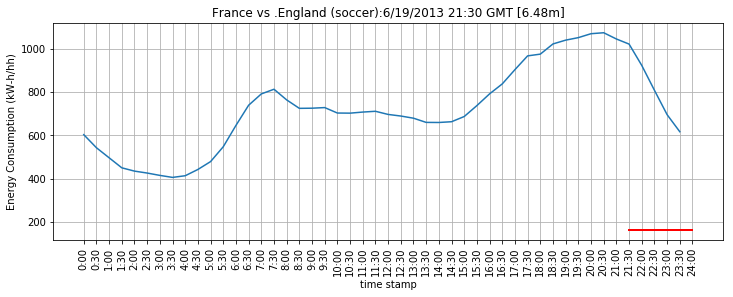

In [35]:
# Create a plotting function.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh)")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

# Enter details for the  England VS. Ukraine game, which took place on day 19
# between 21:30 and 24:00 (approx).

dfevent = df_England_Ukraine
title   = "France vs .England (soccer):6/19/2013 21:30 GMT [6.48m]"
tsb     = '21:30'
tse     = '24:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [37]:
# Create a dataframe representing energy consumption for jun 19th 2013, the day
# of the  England vs . Ukraine game.

df_England_Ukraine = df.loc[df['day']==19]
df_England_Ukraine = df_England_Ukraine.set_index(df_England_Ukraine["tstamp"])
df_England_Ukraine.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2013-06-19 00:00:00,23.821,2.765,15.678,32.311,177.155,62.260,18.319,50.907,4.488,...,81,84,676,36,4247,602.932,0.141967,0.229636,19,0:00
0:30,2013-06-19 00:30:00,23.694,2.425,16.143,29.376,155.527,57.656,18.223,46.849,4.692,...,82,84,675,36,4247,542.390,0.127711,0.191911,19,0:30
1:00,2013-06-19 01:00:00,22.353,2.190,14.180,27.975,142.696,55.282,16.250,45.460,4.096,...,82,84,675,36,4247,495.964,0.116780,0.165861,19,1:00
1:30,2013-06-19 01:30:00,20.800,1.919,13.306,27.886,125.607,50.892,15.715,42.467,3.531,...,82,84,675,36,4247,449.553,0.105852,0.136319,19,1:30
2:00,2013-06-19 02:00:00,22.403,1.859,12.913,26.049,121.647,49.378,14.798,42.283,3.279,...,82,84,675,36,4247,434.292,0.102259,0.131729,19,2:00


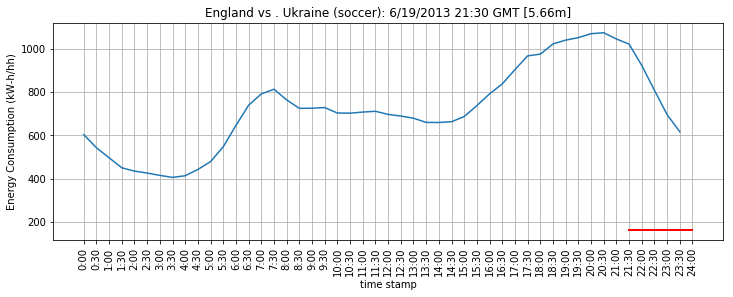

In [50]:
# Enter details for the England vs. Ukraine game, which took place on day 19
# between 21:30 and 24:00 (approx).

dfevent = df_England_Ukraine
title   = "England vs . Ukraine (soccer): 6/19/2013 21:30 GMT [5.66m]"
tsb     = '21:30'
tse     = '24:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)